### Importing libraries and data and renaming columns

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.\n",
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go



In [4]:
%matplotlib inline

In [5]:
path = r'C:\\Users\\pklet\\OneDrive\\Petar\\University Rankings Data_Task 6'

In [6]:
df_rank = pd.read_csv(os.path.join(path, 'THE_World_Universities_rankings_200.csv'), index_col = False)

In [7]:
df_rank.columns

Index(['rank', 'overall_scores', 'scores_citations', 'scores_industry_income',
       'scores_international_outlook', 'scores_research', 'scores_teaching',
       'stats_number_students', 'stats_student_staff_ratio',
       'stats_intl_students_%', 'Year'],
      dtype='object')

In [8]:
df_rank.shape

(1605, 11)

In [9]:
df_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   rank                          1605 non-null   int64  
 1   overall_scores                1605 non-null   float64
 2   scores_citations              1605 non-null   float64
 3   scores_industry_income        1605 non-null   float64
 4   scores_international_outlook  1605 non-null   float64
 5   scores_research               1605 non-null   float64
 6   scores_teaching               1605 non-null   float64
 7   stats_number_students         1605 non-null   int64  
 8   stats_student_staff_ratio     1605 non-null   float64
 9   stats_intl_students_%         1605 non-null   int64  
 10  Year                          1605 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 138.1 KB


In [10]:
# # Check for missing values

df_rank.isnull().sum()

rank                            0
overall_scores                  0
scores_citations                0
scores_industry_income          0
scores_international_outlook    0
scores_research                 0
scores_teaching                 0
stats_number_students           0
stats_student_staff_ratio       0
stats_intl_students_%           0
Year                            0
dtype: int64

In [11]:
# Duplicates check
dups = df_rank.duplicated()

In [12]:
dups.shape

(1605,)

In [13]:
rank_2016 = df_rank[df_rank.Year == 2016]
rank_2017 = df_rank[df_rank.Year == 2017]
rank_2018 = df_rank[df_rank.Year == 2018]
rank_2019 = df_rank[df_rank.Year == 2019]
rank_2020 = df_rank[df_rank.Year == 2020]
rank_2021 = df_rank[df_rank.Year == 2021]
rank_2022 = df_rank[df_rank.Year == 2022]
rank_2023 = df_rank[df_rank.Year == 2023]

### 2. The elbow technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(df_rank).score(df_rank) for i in range(len(kmeans))]
score

C:\Users\pklet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\pklet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\pklet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\pklet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\pklet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

[-300152144985.9181,
 -105752300272.16776,
 -54647084599.06793,
 -32860440605.876884,
 -20758522876.649307,
 -14484889609.562805,
 -11354316648.69078,
 -8645563288.325647,
 -6870580926.715152]

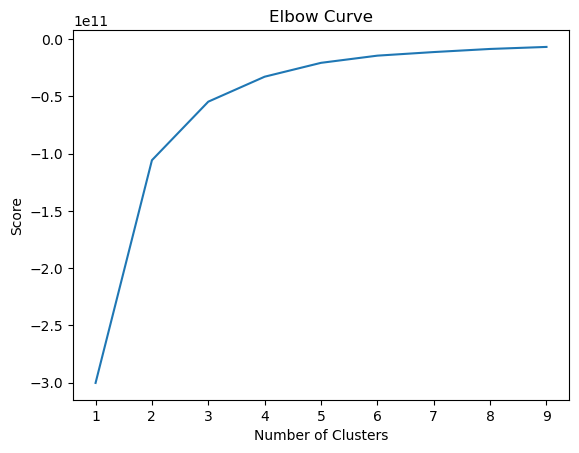

In [23]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### #  there's a large jump from 2 to 4 on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is 3.

### 3. k-means clustering

In [24]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [25]:
# Fit the k-means object to the data.
kmeans.fit(df_rank)

C:\Users\pklet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [27]:
df_rank['clusters'] = kmeans.fit_predict(df_rank)

C:\Users\pklet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [28]:
df_rank.head()

,rank,overall_scores,scores_citations,scores_industry_income,scores_international_outlook,scores_research,scores_teaching,stats_number_students,stats_student_staff_ratio,stats_intl_students_%,Year,clusters
0,1,95.15,99.8,97.8,64.0,97.6,95.6,2243,6.9,26,2016,1
1,2,94.17,98.8,73.1,94.4,98.9,86.5,19920,11.6,34,2016,1
2,3,93.89,99.9,63.3,76.3,96.2,92.5,15596,7.8,22,2016,1
3,4,92.81,97.0,55.0,91.5,96.7,88.2,18810,11.8,34,2016,1
4,5,92.00,99.7,95.4,84.0,88.6,89.4,11074,9.0,33,2016,1


In [29]:
df_rank['clusters'].value_counts()

0    707
1    601
2    297
Name: clusters, dtype: int64

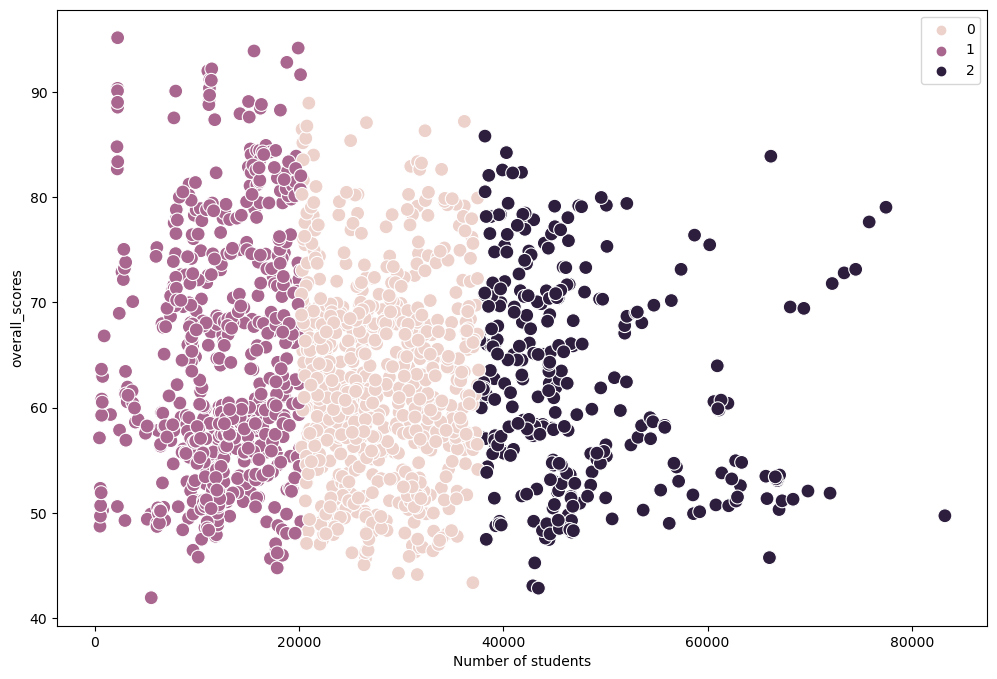

In [37]:
# Plot the clusters for the "rank" and "stats_number_students" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_rank['stats_number_students'], y=df_rank['overall_scores'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of students') # Label x-axis.
plt.ylabel('overall_scores') # Label y-axis.
plt.show()

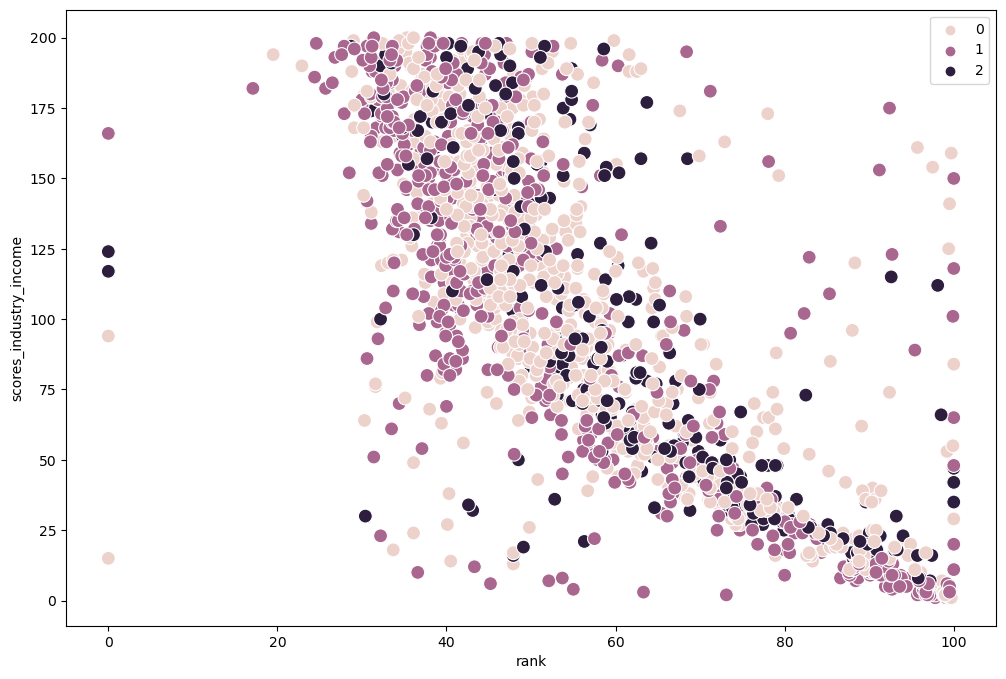

In [46]:
# Plot the clusters for the "rank" and "scores_industry_income" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_rank['scores_industry_income'], y=df_rank['rank'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('rank') # Label x-axis.
plt.ylabel('scores_industry_income') # Label y-axis.
plt.show()

In [40]:
df_rank.loc[df_rank['clusters'] == 2, 'cluster'] = 'dark purple'
df_rank.loc[df_rank['clusters'] == 1, 'cluster'] = 'purple'
df_rank.loc[df_rank['clusters'] == 0, 'cluster'] = 'pink'

In [41]:
df_rank.columns

Index(['rank', 'overall_scores', 'scores_citations', 'scores_industry_income',
       'scores_international_outlook', 'scores_research', 'scores_teaching',
       'stats_number_students', 'stats_student_staff_ratio',
       'stats_intl_students_%', 'Year', 'clusters', 'cluster'],
      dtype='object')

In [44]:
df_rank.groupby('cluster').agg({'overall_scores':['mean', 'median'],
        'scores_citations':['mean', 'median'],
       'scores_industry_income':['mean', 'median'],
        'scores_international_outlook':['mean', 'median'],
       'stats_number_students':['mean', 'median'],
        'scores_research':['mean', 'median'],
        'scores_teaching':['mean', 'median'],
        'scores_research':['mean', 'median'],
        'stats_student_staff_ratio':['mean', 'median']})

overall_scores        scores_citations         \
                      mean median             mean median   
cluster                                                     
dark purple      62.333939  61.42        60.218519   56.9   
pink             62.496167  61.79        54.744130   48.4   
purple           64.363062  61.11        57.506489   52.2   

            scores_industry_income        scores_international_outlook         \
                              mean median                         mean median   
cluster                                                                         
dark purple              62.028956   60.3                    80.232660   83.8   
pink                     56.449929   52.6                    81.389816   85.9   
purple                   54.592180   47.0                    85.652579   89.5   

            stats_number_students          scores_research         \
                             mean   median            mean median   
cluster                                                             
dark purple          47345.097643  44801.0       60.981818   52.8   
pink                 27835.578501  26871.0       59.030835   52.5   
purple               12600.146423  12647.0       59.260899   54.0   

            scores_teaching        stats_student_staff_ratio         
                       mean median                      mean median  
cluster                                                              
dark purple       61.347138   59.3                 21.453872   17.2  
pink              69.490240   71.2                 20.292504   15.5  
purple            71.809983   75.3                 14.058236   12.8

## The condacted cluster analisys did not confirm that the factor industry_income have relationship with the ranking of the universities.